<a href="https://colab.research.google.com/github/naokityokoyama/Machine_Learning/blob/master/Machine_Learning_Arvore_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier

In [ ]:
credito = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv')

## Separando as colunas como Atributos e classe 

In [ ]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

## Instanciando o labelencoder 

In [ ]:
labelencoder = LabelEncoder()

## Tranformando de qualitativo para quantitativo

In [ ]:
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

## Divisão entre treinamento e teste

In [ ]:
#criando variaveis de treino e teste 
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state = 0)

## Criando Algoritmo Arvore de Decisão 

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treinamento, y_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Vamos criar um grafico dessa arvore 

In [ ]:
pip install graphviz

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(arvore, out_file='tree.dot')

agora acessando o website www.webgraphviz.com

Vamos abrir o arquivo tree.dot e passar para o site acima e visualizar a arvore

## Previsoes 
predict()

In [ ]:
y_pred = arvore.predict(x_teste) #aqui ele ja fez a previsao, lembrando que só passa o X pois quer prever o resultado Y

In [ ]:
confusao = confusion_matrix(y_teste, y_pred )  #para mostrar a previsao acima na matriz confusao 
confusao

array([[ 20,  19,   2,   7],
       [ 21, 114,   3,  45],
       [  2,   0,   1,   2],
       [  3,  40,   0,  21]])

In [ ]:
taxa_de_acerto = accuracy_score(y_teste, y_pred)
taxa_de_erro = 1-taxa_de_acerto

In [ ]:
print (f'A acuracia desse modelo foi de {round(taxa_de_acerto*100,2)} % / Taxa de erro foi de {round(taxa_de_erro*100,2)} %')

A acuracia desse modelo foi de 52.0 % / Taxa de erro foi de 48.0 %


## modelo na Yellowbrick

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


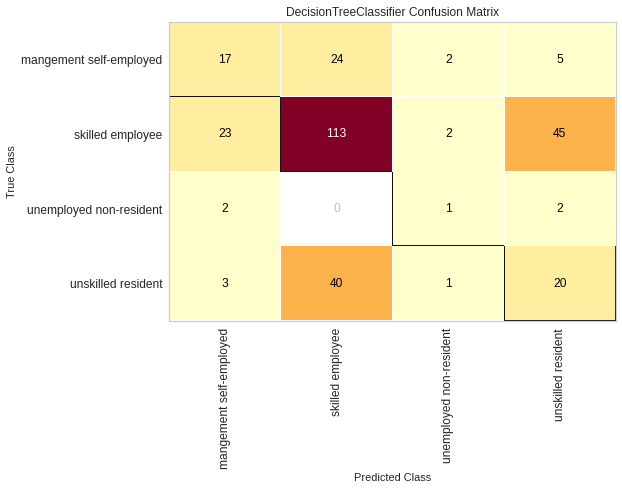

In [ ]:
visualizador = ConfusionMatrix(DecisionTreeClassifier()) 
visualizador.fit(x_treinamento, y_treinamento) 
visualizador.score(x_teste, y_teste) 
visualizador.poof() #mostra os valores de x e y mas não mostra a acuracia 